In [198]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC

RANDOM_STATE = 55

In [199]:
df = pd.read_csv("CAD Database.csv")

In [200]:
df = df[['Age', 'Sex', 'Diabetes Mellitus', 'Hypertension', 'Current Smoker', 'EX-Smoker', 'Obesity', 'Typical Chest Pain','Left Ventricular Hypertrophy', 'Low Density Lipoprotein', 'High Density Lipoprotein', 'Ejection Fraction', 'Regional Wall Motion Abnormalities', 'Valvular Heart Disease', 'Result']]

In [201]:
cat_variables = ['Sex', 'Obesity', 'Left Ventricular Hypertrophy', 'Valvular Heart Disease']

In [202]:
df = pd.get_dummies(data = df,columns = cat_variables)

In [203]:
df

,Age,Diabetes Mellitus,Hypertension,Current Smoker,EX-Smoker,Typical Chest Pain,Low Density Lipoprotein,High Density Lipoprotein,Ejection Fraction,Regional Wall Motion Abnormalities,...,Sex_Fmale,Sex_Male,Obesity_N,Obesity_Y,Left Ventricular Hypertrophy_N,Left Ventricular Hypertrophy_Y,Valvular Heart Disease_Moderate,Valvular Heart Disease_N,Valvular Heart Disease_Severe,Valvular Heart Disease_mild
0,53,0,1,1,0,0,155,30.0,50,0,...,False,True,False,True,True,False,False,True,False,False
1,67,0,1,0,0,1,121,36.0,40,4,...,True,False,False,True,True,False,False,True,False,False
2,54,0,0,1,0,1,70,45.0,40,2,...,False,True,True,False,True,False,False,False,False,True
3,66,0,1,0,0,0,55,27.0,55,0,...,True,False,False,True,True,False,False,False,True,False
4,50,0,1,0,0,0,110,50.0,50,0,...,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,0,0,0,0,1,115,44.0,45,0,...,False,True,False,True,True,False,False,True,False,False
299,55,0,0,0,0,0,40,23.0,40,0,...,True,False,False,True,True,False,False,False,False,True
300,48,0,1,0,0,0,112,42.0,55,0,...,True,False,False,True,True,False,False,True,False,False
301,57,1,0,0,0,0,130,49.0,55,0,...,True,False,False,True,True,False,False,True,False,False


In [204]:
features = [x for x in df.columns if x not in 'Result']

In [205]:
df[features] = df[features].astype(int)

In [206]:
df['Result']

0         CAD
1         CAD
2         CAD
3      Normal
4      Normal
        ...  
298       CAD
299    Normal
300    Normal
301    Normal
302       CAD
Name: Result, Length: 303, dtype: object

In [207]:
df['Result'] = df['Result'].map({"CAD": 1, "Normal": 0})

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Result'], train_size = 0.8, random_state = RANDOM_STATE)

In [209]:
# X_train = X_train.astype(int)

In [210]:
# X_test = X_test.astype(int)

In [211]:
# y_train = y_train.map({"CAD": 1, "Normal": 0})

In [212]:
# y_test = y_test.map({"CAD": 1, "Normal": 0})

In [213]:
n = int(len(df)*0.7)## Let's use 70% to train and 30% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [214]:
xgb_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 30)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.46334
[1]	validation_0-logloss:0.44105
[2]	validation_0-logloss:0.42363
[3]	validation_0-logloss:0.40951
[4]	validation_0-logloss:0.39416
[5]	validation_0-logloss:0.38396
[6]	validation_0-logloss:0.37773
[7]	validation_0-logloss:0.36633
[8]	validation_0-logloss:0.36289
[9]	validation_0-logloss:0.35864
[10]	validation_0-logloss:0.35168
[11]	validation_0-logloss:0.35133
[12]	validation_0-logloss:0.35009
[13]	validation_0-logloss:0.35273
[14]	validation_0-logloss:0.35041
[15]	validation_0-logloss:0.34884
[16]	validation_0-logloss:0.34973
[17]	validation_0-logloss:0.35131
[18]	validation_0-logloss:0.35013
[19]	validation_0-logloss:0.35159
[20]	validation_0-logloss:0.35386
[21]	validation_0-logloss:0.35189
[22]	validation_0-logloss:0.35460
[23]	validation_0-logloss:0.35356
[24]	validation_0-logloss:0.35287
[25]	validation_0-logloss:0.35526
[26]	validation_0-logloss:0.35279
[27]	validation_0-logloss:0.35332
[28]	validation_0-logloss:0.35218
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [215]:
xgb_model.best_iteration

15

In [216]:
y_score = xgb_model.predict(X_test)
y_score

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [217]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9339
Metrics test:
	Accuracy score: 0.8852


# Logistic Regression

In [218]:
classifier = LogisticRegression(max_iter=650)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=650)

In [219]:
y_pred = classifier.predict(X_test)

In [220]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(classifier.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(classifier.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9091
Metrics test:
	Accuracy score: 0.8033


# SVM

In [221]:
scaler = StandardScaler()
X_train_normalized_2 = scaler.fit_transform(X_train)
X_test_normalized_2 = scaler.transform(X_test)

In [222]:
svm_classifier = SVC(kernel='linear', C=2.0, random_state=RANDOM_STATE)

In [223]:
svm_classifier.fit(X_train_normalized, y_train)

SVC(C=2.0, kernel='linear', random_state=55)

In [224]:
y_predictions = svm_classifier.predict(X_test_normalized)

In [225]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(svm_classifier.predict(X_train_normalized),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(svm_classifier.predict(X_test_normalized),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9091
Metrics test:
	Accuracy score: 0.8361


# ROC Curve


In [226]:
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, y_score)
xgb_auc = roc_auc_score(y_test, y_score)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, y_predictions)
svm_auc = roc_auc_score(y_test, y_predictions)

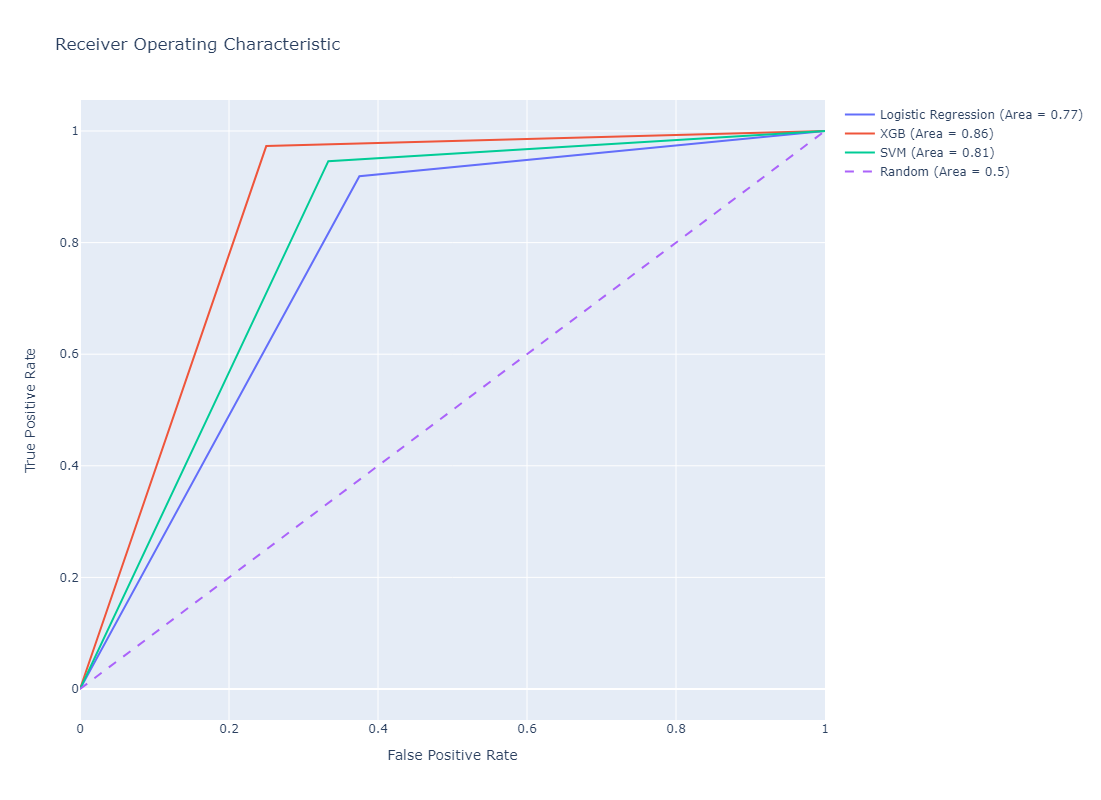

In [227]:
import plotly.graph_objects as go

trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the XGBoost ROC curve
trace1 = go.Scatter(
    x=xgb_fpr,
    y=xgb_tpr,
    mode='lines',
    name=f'XGB (Area = {xgb_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace2 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace3 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [228]:
# pip install plotly